In [1]:
%%time
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings 
warnings.filterwarnings("ignore")

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

%matplotlib inline

C:\Users\Hicham\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hicham\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Wall time: 26.5 s


In [2]:
dataTrain = pd.read_csv("train.csv") 

In [3]:
dataTest  = pd.read_csv("test.csv") 

In [4]:
print dataTrain.shape, ' --- ', dataTest.shape

(32769, 10)  ---  (58921, 10)


In [5]:
y_train = dataTrain.ACTION

In [6]:
X_train = dataTrain.drop(['ACTION'], axis=1)
X_test  = dataTest.drop(['id'], axis=1)

In [7]:
num_train = np.shape(X_train)[0]
print num_train, ' --- ', X_test.shape

32769  ---  (58921, 9)


### Basic Model using Decision trees

In [8]:
# set of parameters for DECISION TREES
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 3, 5, 7, 9, 20],
              "max_depth": [None, 2, 3, 5, 7],
              "min_samples_leaf": [1, 3, 5, 7],
              "max_leaf_nodes": [None, 5, 7],
              }
dt = DecisionTreeClassifier()

In [18]:
#DT n_jobs=-1 for parallel processing
grid_search = GridSearchCV(dt, param_grid, n_jobs=-1,verbose=1, scoring='roc_auc', cv=10)
grid_search.fit(X_train, y_train)
print 'Best score: %0.4f' % grid_search.best_score_
print 'Best parameters set:', grid_search.best_estimator_.get_params()

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed: 10.4min finished


Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best score: 0.7864
Best parameters set: {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 9, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'max_features': None, 'max_depth': None, 'class_weight': None}


In [9]:
def create_test_submission(filename, prediction):
    content = ['id,ACTION']
    for i, p in enumerate(prediction):
        content.append('%i,%f' % (i + 1, p))
    f = open(filename, 'w')
    f.write('\n'.join(content))
    f.close()
    print('Saved')

In [10]:
print("Making prediction and saving results...")
preds = grid_search.predict_proba(X_test)[:, 1]
create_test_submission('test_preds.csv', preds)

Making prediction and saving results...


NameError: name 'grid_search' is not defined

### DT Score from Kaggle leaderboard == 0.7856

### Random Forest Model

In [37]:
# set of parameters for RANDOM FOREST
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 5],
              "min_samples_split": [1, 3, 5],
              "min_samples_leaf": [1, 3, 5],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier(n_estimators=10)

In [38]:
gsRF = GridSearchCV(rf, param_grid, scoring='roc_auc', n_jobs=-1, cv=10)
gsRF.fit(X_train, y_train)
print 'Best score: %0.4f' % grid_search.best_score_
print 'Best Params',gsRF.best_params_

Best score: 0.8221
Best Params {'bootstrap': False, 'min_samples_leaf': 5, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 1, 'max_depth': None}


In [49]:
randF = RandomForestClassifier(n_estimators=10, bootstrap= False, min_samples_leaf= 5, min_samples_split= 5, 
                               criterion= 'entropy', max_features= 3, max_depth= None)

In [50]:
randF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Variables Importance fractions are all ==  1.0


C:\Users\Hicham\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


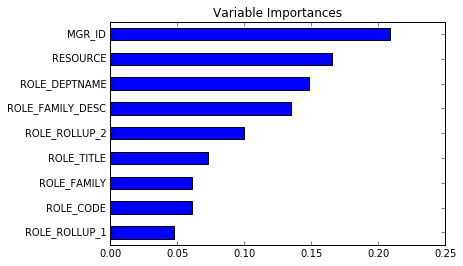

In [54]:
# Take advantage of pandas built-in plotting for a 1-liner
pd.Series(index=X_train.columns, data = randF.feature_importances_).order().plot(kind='barh', title='Variable Importances')
print "Variables Importance fractions are all == ", sum(randF.feature_importances_)

In [29]:
X_train.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [94]:
X_train.cov()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
RESOURCE,1.167855e+09,1.361446e+07,-1.864191e+06,2090290.280921,1.944224e+07,3.113527e+06,4.995148e+07,1.066632e+08,1528495.166674
MGR_ID,1.361446e+07,1.290823e+09,-2.786664e+06,-59458.468216,-6.506562e+06,1.991966e+07,-4.616955e+07,-4.269387e+08,-845275.677085
ROLE_ROLLUP_1,-1.864191e+06,-2.786664e+06,1.182779e+08,1651242.829774,-1.968946e+06,3.445275e+06,-5.704147e+06,3.220478e+07,-1568092.348196
ROLE_ROLLUP_2,2.090290e+06,-5.945847e+04,1.651243e+06,20716958.528875,-5.226806e+05,1.173177e+06,5.971132e+06,3.181453e+07,397983.486164
ROLE_DEPTNAME,1.944224e+07,-6.506562e+06,-1.968946e+06,-522680.555188,3.595318e+08,-4.079149e+06,-3.792248e+06,6.034241e+07,1131775.364994
ROLE_TITLE,3.113527e+06,1.991966e+07,3.445275e+06,1173177.199602,-4.079149e+06,9.632622e+08,3.682376e+08,-3.883044e+07,27991268.405990
ROLE_FAMILY_DESC,4.995148e+07,-4.616955e+07,-5.704147e+06,5971132.098911,-3.792248e+06,3.682376e+08,4.831565e+09,-1.261443e+09,37383863.142603
ROLE_FAMILY,1.066632e+08,-4.269387e+08,3.220478e+07,31814526.621171,6.034241e+07,-3.883044e+07,-1.261443e+09,1.009792e+10,-86388665.381022
ROLE_CODE,1.528495e+06,-8.452757e+05,-1.568092e+06,397983.486164,1.131775e+06,2.799127e+07,3.738386e+07,-8.638867e+07,33457843.239572


In [61]:
X_train.corr()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
RESOURCE,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


In [38]:
print "Count Unique values of each column in train set"
print X_train.apply(lambda x: len(x.unique()))

Count Unique values of each column in train set
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64


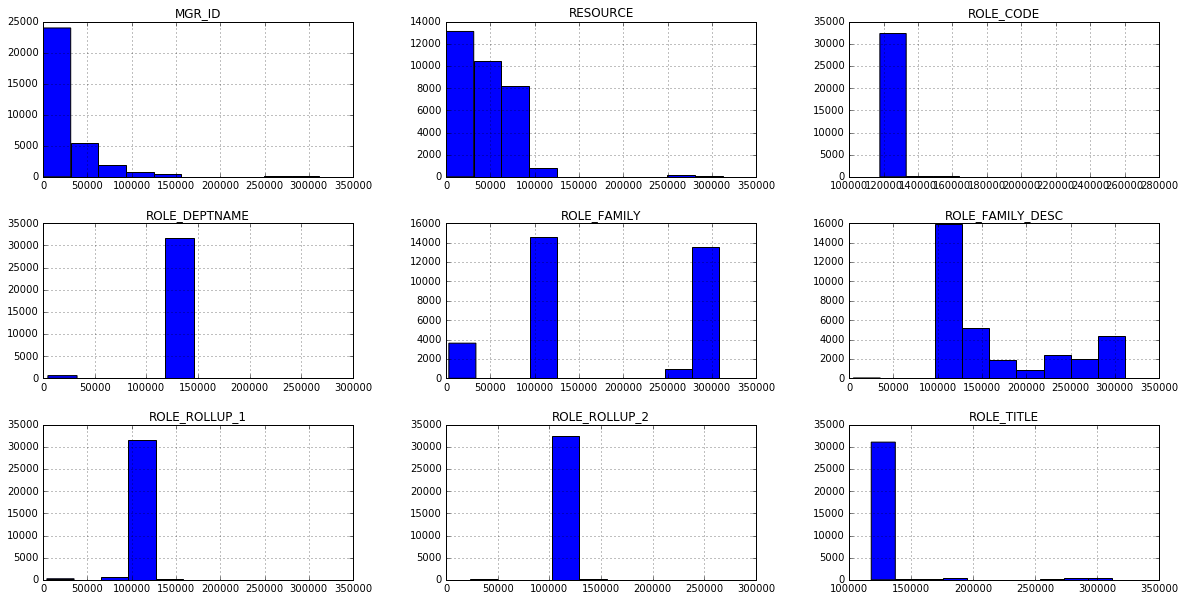

In [83]:
X_train.hist(figsize=(20,10))
plt.show()

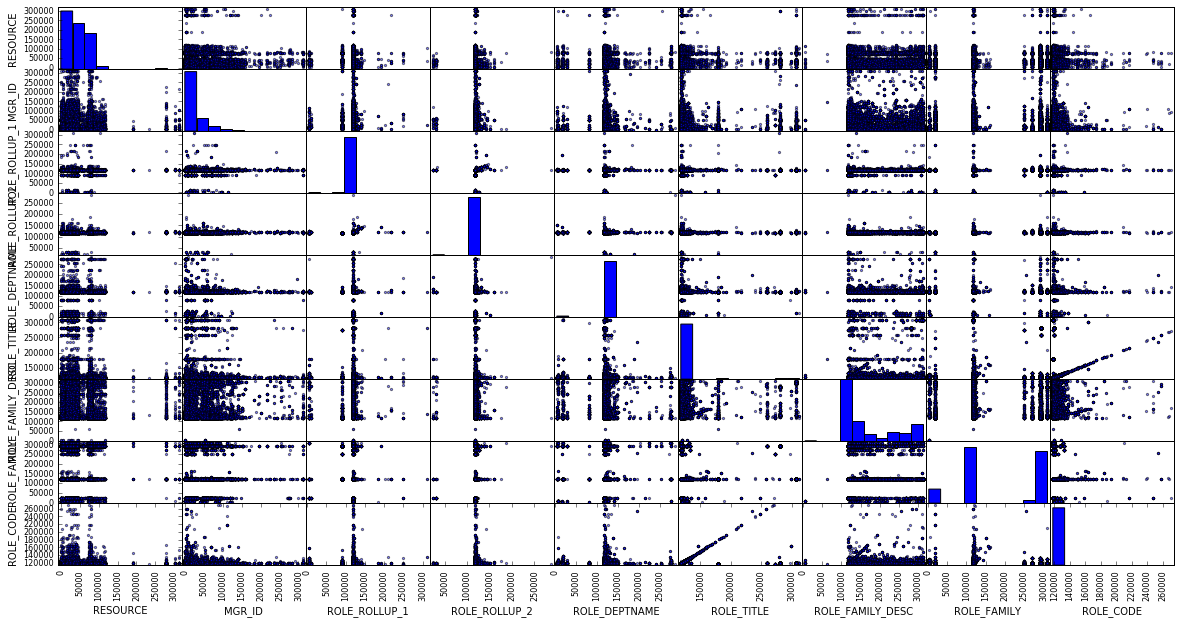

In [81]:
scatter_matrix(X_train, figsize=(20,10))
plt.show()

In [87]:
print "Missing values per column:"
X_train.apply(lambda x: sum(x.isnull()),axis=0) 

Missing values per column:


RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [84]:
#Outliers
low = .05
high = .95
print X_train.quantile([low, high])

      RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0.05      3853    1140         117902         117936         117878   
0.95     81360   87910         119134         119281         125016   

      ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0.05      117885            117906        19721     117888  
0.95      140847            306795       292795     125795  


In [90]:
X_train = X_train.drop_duplicates()

In [7]:
X_train.shape

(32769, 9)

In [8]:
#p95 = np.percentile(X_train['RESOURCE'], 95)
#Eliminate data above percentile 95
#df[df.Column < df.Column.quantile(.95)]
X_tr = X_train
X_tr = X_train[X_train.RESOURCE < np.percentile(X_train['RESOURCE'], 95)] #np > numpy
X_tr = X_train[X_train.RESOURCE > np.percentile(X_train['RESOURCE'], 5)]

In [9]:
X_tr.shape

(30823, 9)

### Features Selection ...

In [14]:
def findMultiplicity(X):
    '''
        This finds the multiplicity of different 
        columns. If a multiplicity is 1, it is going to
        be safe to just neglect one of the categorical 
        variables
    '''
    mult = {}
    for c in X.columns:
        temp = X.pivot_table(index=c, aggfunc=lambda x:len(x.unique()),fill_value=0).apply(np.max)
        print c, ' --- \n', temp
        mult[c] = temp
        print '**************'

    multiplicity = pd.DataFrame(mult)
    multiplicity = multiplicity[ sorted(multiplicity.columns) ]

    return multiplicity

''' Show Multiplicity '''
findMultiplicity(X_train)

RESOURCE  --- 
MGR_ID              587
ROLE_CODE           121
ROLE_DEPTNAME       193
ROLE_FAMILY          36
ROLE_FAMILY_DESC    246
ROLE_ROLLUP_1        53
ROLE_ROLLUP_2        68
ROLE_TITLE          121
dtype: int64
**************
MGR_ID  --- 
RESOURCE            97
ROLE_CODE            8
ROLE_DEPTNAME        8
ROLE_FAMILY          5
ROLE_FAMILY_DESC    11
ROLE_ROLLUP_1        7
ROLE_ROLLUP_2        7
ROLE_TITLE           8
dtype: int64
**************
ROLE_ROLLUP_1  --- 
MGR_ID              1745
RESOURCE            5609
ROLE_CODE            241
ROLE_DEPTNAME        330
ROLE_FAMILY           61
ROLE_FAMILY_DESC    1146
ROLE_ROLLUP_2         16
ROLE_TITLE           241
dtype: int64
**************
ROLE_ROLLUP_2  --- 
MGR_ID               348
RESOURCE            1482
ROLE_CODE            104
ROLE_DEPTNAME         76
ROLE_FAMILY           37
ROLE_FAMILY_DESC     265
ROLE_ROLLUP_1          9
ROLE_TITLE           104
dtype: int64
**************
ROLE_DEPTNAME  --- 
MGR_ID              304


,MGR_ID,RESOURCE,ROLE_CODE,ROLE_DEPTNAME,ROLE_FAMILY,ROLE_FAMILY_DESC,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_TITLE
MGR_ID,NaN,587,592,304,946,705,1745,348,592
RESOURCE,97,NaN,2375,332,4085,3128,5609,1482,2375
ROLE_CODE,8,121,NaN,46,26,19,241,104,1
ROLE_DEPTNAME,8,193,163,NaN,193,171,330,76,163
ROLE_FAMILY,5,36,1,17,NaN,8,61,37,1
ROLE_FAMILY_DESC,11,246,153,136,291,NaN,1146,265,153
ROLE_ROLLUP_1,7,53,55,40,87,47,NaN,9,55
ROLE_ROLLUP_2,7,68,65,45,113,57,16,NaN,65
ROLE_TITLE,8,121,1,46,26,19,241,104,NaN


#### ROLE_CODE or ROLE_TITLE will be neglected
##### We will train a new model to see which variable we'll neglect

In [35]:
X_train = X_train.drop(['ROLE_CODE', 'RESOURCE', 'MGR_ID'], axis=1)
X_test  = X_test.drop(['ROLE_CODE', 'RESOURCE', 'MGR_ID'], axis=1)

In [36]:
print X_train.shape, ' --- ', X_test.shape

(32769, 6)  ---  (58921, 6)


In [24]:
grid_search = GridSearchCV(dt, param_grid, n_jobs=-1,verbose=1, scoring='roc_auc', cv=10)
%time grid_search.fit(X_train, y_train)
print 'Best score: %0.4f' % grid_search.best_score_
print 'Best parameters set:', grid_search.best_estimator_.get_params()

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  5.0min finished


Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Wall time: 5min
Best score: 0.8221
Best parameters set: {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'max_features': None, 'max_depth': None, 'class_weight': None}


In [ ]:
# Submission file for 6 features
print("Making prediction and saving results...")
preds = grid_search.predict_proba(X_test)[:, 1]
create_test_submission('test_preds.csv', preds)

##### ROLE_TITLE Dropped -> 0.7825 
##### ROLE_CODE Dropped -> 0.7826 ---- Kaggle Leaderboard : 0.7859
##### 'ROLE_CODE', 'RESOURCE', 'MGR_ID' :: Dropped  -> Train == 0.8221  ---- Kaggle Test == 0.82048

In [26]:
print("Making prediction and saving results...")
preds = grid_search.predict_proba(X_test)[:, 1]
create_test_submission('preds_6Features.csv', preds)

Making prediction and saving results...
Saved


In [10]:
#Split dataset to train and test
XTr, XTe, yTr, yTe = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [11]:
XTr.shape

(26215, 9)

In [9]:
#Training function
def performance(X,Y):
    kf = StratifiedKFold(Y, n_folds=3, random_state=1)    
    gs = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=kf)
    gs.fit(X,Y)
    return gs

#Validation function
def validation(clf1, Xv, Yv):
    preds = clf1.predict_proba(Xv)[:,1]
    return roc_auc_score(Yv, preds)

In [11]:
#Random Forest Selection
def random_forest_selection(X,Y,n_features):
    
    params = {"max_depth":[3,5,7,9],
              "min_samples_leaf" : [1,2,5],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    
    RandF = RandomForestClassifier(n_estimators=10,random_state=1 , n_jobs=2)
    gsRF = GridSearchCV(RandF, param_grid, scoring='roc_auc', n_jobs=-1, cv=3)
    gsRF.fit(X,Y)
    bestClf = gsRF.best_estimator_
    rf = bestClf.feature_importances_
    
    rf=zip(rf,X.columns)
    rf=sorted(rf,reverse=True)[:n_features]
 
    return [x[1] for x in rf]
print 'Processing started ...'
for n_features in [3, 4, 5, 6, 7, 8, 9]:
    print n_features  
    rfFeatures = random_forest_selection(XTr, yTr, n_features)
    print 'Selected features : ', rfFeatures
    %time gs = performance(XTr[rfFeatures], yTr)
    %time print gs.best_score_, gs.best_params_
    %time print validation(gs.best_estimator_, XTe[rfFeatures], yTe)
    print ':: *************************************** ::'

Processing started ...
3
Selected features :  ['MGR_ID', 'ROLE_DEPTNAME', 'RESOURCE']
Wall time: 2min 8s
0.682362670182 {'min_samples_split': 20, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 7}
Wall time: 0 ns
0.701919029579
Wall time: 20 ms
:: *************************************** ::
4
Selected features :  ['MGR_ID', 'ROLE_DEPTNAME', 'RESOURCE', 'ROLE_FAMILY_DESC']
Wall time: 2min 18s
0.70646672089 {'min_samples_split': 20, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}
Wall time: 0 ns
0.723340916918
Wall time: 12 ms
:: *************************************** ::
5
Selected features :  ['MGR_ID', 'ROLE_DEPTNAME', 'RESOURCE', 'ROLE_FAMILY_DESC', 'ROLE_ROLLUP_2']
Wall time: 2min 39s
0.723959725427 {'min_samples_split': 20, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
Wall time: 0 ns
0.751361696984
Wall time: 6 ms
:: *************************************** ::
6


#### Feature Selection using LASSO

In [21]:
def lasso_selection(X,Y,n_features):
    
    cols = X.columns
    X=StandardScaler().fit_transform(X)
  
    params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5]}
    
    clf = Lasso(random_state=1)
    gs = GridSearchCV(clf, params)
    gs.fit(X,Y)
    ls = gs.best_estimator_.coef_
    
    ls=zip(ls,cols)
    ls=sorted(ls,reverse=True)[:n_features]
 
    return [x[1] for x in ls]

print 'LASSO Processing has started ...'
for n_features in [3, 4, 5, 6, 7, 8, 9]:
    lassoFeatures = lasso_selection(XTr,yTr,n_features)
    print 'Selected features : ', lassoFeatures
    %time gs = performance(XTr[lassoFeatures], yTr)
    %time print gs.best_score_, gs.best_params_
    %time print 'Testing ... ',validation(gs.best_estimator_, XTe[lassoFeatures], yTe)
    print '******************************'

LASSO Processing has started ...
Selected features :  ['ROLE_TITLE', 'ROLE_ROLLUP_2', 'ROLE_ROLLUP_1']
Wall time: 1min 37s
0.753830109661 {'min_samples_split': 20, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Wall time: 0 ns
Testing ...  0.775041701019
Wall time: 4 ms
******************************
Selected features :  ['ROLE_TITLE', 'ROLE_ROLLUP_2', 'ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC']
Wall time: 1min 40s
0.775015570566 {'min_samples_split': 5, 'max_leaf_nodes': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}
Wall time: 0 ns
Testing ...  0.809070428194
Wall time: 5 ms
******************************
Selected features :  ['ROLE_TITLE', 'ROLE_ROLLUP_2', 'ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY']
Wall time: 1min 40s
0.780153651361 {'min_samples_split': 5, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
Wall time: 0 ns
Testing ...  0.803175756532
Wall time: 5 ms
************

In [ ]:
'ROLE_TITLE', 'ROLE_ROLLUP_2', 'ROLE_ROLLUP_1', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_DEPTNAME'

#### Model using KNN

In [33]:
#KNN
knn = KNeighborsClassifier()
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

Knngrid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=4)
Knngrid.fit(XTr, yTr)
print 'Best score: %0.4f' % Knngrid.best_score_
print 'Best parameters set:', Knngrid.best_estimator_.get_params()

Best score: 0.6634
Best parameters set: {'n_neighbors': 4, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 30}


In [34]:
knn_pred = Knngrid.predict(XTe)
print 'KNN Score >', roc_auc_score(yTe, knn_pred)

KNN Score > 0.578021780194


In [16]:
? AdaBoostClassifier

#### Model AdaBoost Classifier

In [17]:
? DecisionTreeClassifier

In [42]:
AdaBC = AdaBoostClassifier(base_estimator=dt, n_estimators=200, learning_rate=0.01, algorithm='SAMME.R', random_state=1)

In [43]:
AdaBC.fit(XTr, yTr)
ABC_pred = AdaBC.predict(XTe)
print 'AdaBoost Score >', roc_auc_score(yTe, ABC_pred)

AdaBoost Score > 0.67122551424


In [10]:
#Merge train and test datasets
X = np.vstack((X_train, X_test))
X.shape

(91690L, 9L)

In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
encoded = enc.fit_transform(X)
encoded.shape
#print "Dimensions of Binarized ROLE_FAMILY:", encoded.shape[0], "rows and", encoded.shape[1], "columns"


(91690, 16961)

In [12]:
#Split Train and Test Dataset
X_train = encoded[:num_train]
X_test  = encoded[num_train:]
print X_train.shape , '---', X_test.shape

(32769, 16961) --- (58921, 16961)


In [13]:
param_grid = {'C': [2.4, 2.7,  2.8] }
logr = LogisticRegression()

In [14]:
logrid = GridSearchCV(logr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logrid.fit(X_train, y_train)
print 'Best score: %0.4f' % logrid.best_score_
print 'Best parameters set:', logrid.best_estimator_.get_params()

Best score: 0.8658
Best parameters set: {'warm_start': False, 'C': 2.4, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}


In [15]:
print("Making prediction and saving results...")
preds = logrid.predict_proba(X_test)[:, 1]
create_test_submission('log_preds.csv', preds)

Making prediction and saving results...
Saved


##### Kaggle Leaderboard -->  0.88143

#### Support Vector Machine SVM



In [ ]:
#train model with SVM
%%time 
parameters = {"C":[0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9, 10],
              "gamma":[0.1, 0.01, 0.001]}

svmclf = SVC(kernel = "rbf")
svmclf = GridSearchCV(svmclf, parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
svmclf.fit(X_train, y_train)
print 'Best score: %0.4f' % svmclf.best_score_
print 'Best parameters set:', svmclf.best_estimator_.get_params()

#### Kaggle Leaderboard > 0.87611

In [64]:
print("Making prediction and saving results...")
preds = logrid.predict_proba(X_test)[:, 1]
create_test_submission('svm_preds.csv', preds)

Making prediction and saving results...
Saved


In [ ]:
# Recursive Feature Elimination RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 9)
rfe = rfe.fit(X_train, dataTrain.ACTION)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


In [ ]:
%%time
clf1 = LogisticRegression()
clf2 = SVC(kernel = 'rbf', C = 100, gamma = 0.01, probability=True)

df = pd.DataFrame(columns=['w1', 'w2', 'mean', 'std'])

i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        
        if len(set((w1,w2))) == 1: # skip if all weights are equal
            continue
        eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2)], 
                                                    voting='soft', weights=[w1,w2])
                    
        scores = cross_val_score(estimator=eclf, X=X_train,
                                                 y=y_train,
                                                 cv=5, scoring='roc_auc', n_jobs=-1)

        df.loc[i] = [w1, w2, scores.mean(), scores.std()]
        i += 1

df.sort(['mean', 'std'], ascending=[0, 0])

In [ ]:
voting = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2)]

In [11]:
? LogisticRegression

In [13]:
logist = LogisticRegression(C = 2.4, n_jobs=-1)

In [ ]:
%%time
sfs1 = SFS(estimator=logist, k_features=10,
           forward=False, 
           floating=False, 
           scoring='roc_auc',
           print_progress=False,
           cv=5, n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

In [ ]:
print('\nSequential Backward Selection (k=10-):')
print(sfs1.k_feature_idx_)
print('CV Score:')
print(sfs1.k_score_)

In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(logist, step=1, cv=10)
selector = selector.fit(X, y)